# Bryce Shaw 
# ENSF 592 Programming Fundamentals for Data Engineers - FINAL EXAM


## Question 1: Functions (5pts)

For large numbers, the natural logrithm `ln()`, logarithm to base e, can be approximated by multiplying the number of digits by 2.3. For example, ln(7654321) is approximately 7 * 2.3 = 16.1.

Write a function: `ln_approx()` that takes a number as argument and retuns the approximate value of the logarithm as explained above. The function should handle both `int` and `float` arguments, and truncate floats prior to counting the digits. Other types, such as `str` do not need to be handeled, i.e. you can assume that the caller takes care of providing either `int` or `float` arguments.

With this function, write a program that computes approximate and actual natural logarithms for 5 large numbers of your choice, testing both int and float, and prints results side by side for comparison. Actual logarithms are available in the `math` module, see `math.log()`.

In [45]:
import warnings
warnings.filterwarnings('ignore')

import math
from pandas._libs import json

def ln_aprox(number):
    try:
        number = float(number)
        message = f"aproximation is { round(2.3 * len(str( int(number) ) ), 1)}, and the actual is {round (math.log(float( number)), 1)}"
        return  message
    except:
        return "INPUT INVALID"
    


print(ln_aprox(234234234234879234))
print( ln_aprox(234234234.234879234))
print( ln_aprox("23423423423487.9234"))
print( ln_aprox("234234234234879234"))
print(ln_aprox(7654321))
print(ln_aprox('7654321'))
print(ln_aprox('765f4321'))

aproximation is 41.4, and the actual is 40.0
aproximation is 20.7, and the actual is 19.3
aproximation is 32.2, and the actual is 30.8
aproximation is 41.4, and the actual is 40.0
aproximation is 16.1, and the actual is 15.9
aproximation is 16.1, and the actual is 15.9
INPUT INVALID


## Question 2: Random (5pts)
Ludo is a board game where players race their tokens to the finish line by rolling a six-sided die and advancing as many steps as the number on the die shows:  
https://en.wikipedia.org/wiki/Ludo_(board_game)

There are 57 steps to take for a token. We wonder how many rolls of dice are necessary on average to complete these 57 steps with one token? 

Write a program that simulates 1000 games, where for each game, a single six-sided die is rolled until the sum of the rolls reaches or exceeds 57 and the number of rolls are counted. The program prints the average number of rolls of the 1000 games.

Note that the expected sum of n rolls is 3.5n. Therefore, the average obtained by the simulation should be close to 16.3 rolls.


In [47]:
import numpy as np
np.random.seed(453)

def ludo():
    dice = 0
    count = 0
    while True:
        count += 1
        dice += np.random.randint(1,7)
        
        if dice >= 57 :
            return count
        
def play_game():
    l = []
    for i in range(1000):
        l.append(ludo())
    
    return sum(l) / len(l)

print(f"The average number of rolls in 1000 games of ludo is {play_game()}")
    


The average number of rolls in 1000 games of ludo is 16.676




## Question 3: Files and strings (8pts)
In the file `email.txt` the content of an email are saved. Write a program that will read the contents of this file, builds a dictionary with the following keys: **from**, **to**, **date**, **subject**, and **body**. The values in the dictionary are the corresponding contents of the email for each key. Finally, the program saves this dictionary in json format to a file `email.json`.

In [10]:
import re
import os
import json

def importfile(file):
    local = os.getcwd()
    fin = open(local + '/' + file, "r")
    words = fin.read()
    fin.close()
    return words

def parse_to_json(email):
    contents = {'from': re.search("From: (.*)", email)[0].replace("From: ",""),
                'subject': re.search("Subject: (.*)", email)[0].replace("Subject: ",""),
                'date': re.search("Date: (.*)", email)[0].replace("Date: ",""),
                'body':  '\n'.join(email.split('\n')[3:])
                }
    return contents

def write_to_json(contents):
    with open('email.json', 'w') as outfile:
        json.dump(contents, outfile)
    print("Wrote to file....")
    print(contents)
    
email_str = importfile('email.txt')

print(re.search("From: (?s)(.*?)@", email_str)[0])
email_json = parse_to_json(email_str)
write_to_json(email_json)

print("\nls...")
!ls

/home/bryce/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:28: DeprecationWarning: Flags not at the start of the expression 'From: (?s)(.*?)@'


From: frank@
Wrote to file....
{'from': 'frank@calgary.ca', 'subject': 'Notes from meeting', 'date': '27 November 2019 at 09:36:49 GMT-7', 'body': 'To: louise@calgary.ca\n\nHello,\nLorem ipsum dolor sit amet, consectetur adipiscing elit, sed do eiusmod tempor incididunt ut labore et dolore magna aliqua. Ut enim ad minim veniam, quis nostrud exercitation ullamco laboris nisi ut aliquip ex ea commodo consequat. Duis aute irure dolor in reprehenderit in voluptate velit esse cillum dolore eu fugiat nulla pariatur. Excepteur sint occaecat cupidatat non proident, sunt in culpa qui officia deserunt mollit anim id est laborum.\n\nCheers,\nFrank'}

ls...
 cfl_data.csv				       FinalExam-SolutionTemplate.ipynb
 email.json				       finalExam.zip
 email.txt				      'Table of Contents.html'
 ENSF592-fall2019-FinalExam_approved_d2l.pdf


## Question 4: Classes (5pts)
Create a class named Citrus which has:
- a `circumference` data variable which is a float (outer (un-peeled) circumference in cm)
- and two class variables: `taste` that can be 'sweet', 'sour' or 'bitter', `peel_thickness` which is a float (thickness of the peel in cm).

Create two classes named Orange and Lemon . These must be sub-classes of the Citrus
class.

Implement a `get_peeled_volume()` method in the parent class that uses the instance's circumference and the class' peel thickness to calculate the volume of the fruit assuming the shape is spherical.

Use 0.7 and 0.3 for peel_thickness and 'sweet' and 'sour' for taste of Orange and Lemon,
respectively. 

The fruit's circumference is an input given per instance, when first created. For example, 
```
print(round(Orange(12).get_peeled_volume(), 2))
```
should print 7.42, and
```
print(round(Lemon(12).get_peeled_volume(), 2))
```
should print 17.48.

Include these two print statements to confirm proper implementation of Orange and Lemon classes.

The volume `V` of a sphere with radius `r` is given by:
$$
V = \frac{4}{3}\cdot \pi \cdot r^3
$$

The circumference `c` of a sphere with radius `r` is given by:
$$
c = 2\pi\cdot r
$$

Note that the peeled radius needed for calculating the peeled volume is `r-peel_thickness`.

In [55]:

class Citrus:
   
    def __int__(self, circumference, taste, peel_thickness):
        self.circumference = circumference
        self.taste = taste
        self.peel_thickness = peel_thickness
        
    def get_peeled_volume(self):
        return   ( self.circumference / (2 * math.pi) - self.peel_thickness )**3 * 4 * math.pi /3
        

        
class Orange(Citrus):
   
    def __init__(self, circumference):
        Citrus.__int__(self, circumference, 'sweet', 0.7)
       
class Lemon(Citrus):
   
    def __init__(self, circumference):
        Citrus.__int__(self, circumference, 'sour', 0.3)
    

print(round(Orange(12).get_peeled_volume(), 2))

print(round(Lemon(12).get_peeled_volume(), 2))

    
    
        

7.42
17.48


## Question 5: Scraping (6pts)

Using `BeautifulSoup` and `requests`, get the Picture of the Day's **image url** and **name**, from NASA Astronomy Picture of the Day webpage for September 15, 2017, the link below:

https://apod.nasa.gov/apod/ap170915.html

The name to extract is `100 Steps Forward` and the URL is https://apod.nasa.gov/apod/image/1709/ConjuncionViaLacteaHumanoVenusLuna_Jaramillo.jpg

In [53]:
import requests
import pandas as pd
from bs4 import BeautifulSoup
import re 
def pic_of_the_day(url):
    
    req = requests.get(url, verify=False).text
    soup = BeautifulSoup(req, 'lxml')
    
    snip = re.search("- (.*)$",  soup.title.string)[0][2:]
    
    src = soup.prettify()
    img = soup.findAll('img')
    return snip + '\n' + 'https://apod.nasa.gov/apod/' + img[0]['src']

url = 'https://apod.nasa.gov/apod/ap170915.html'
print(pic_of_the_day(url))

100 Steps Forward
https://apod.nasa.gov/apod/image/1709/ConjuncionViaLacteaHumanoVenusLuna_Jaramillo1024.jpg


## Question 6: Data (6pts)
Read the CFL games data (cfl_data.csv) input file with pandas and do the following:
1. Remove all rows with missing data.
2. Remove all rows from pre-season games
3. Create a new column `TotalPts` containing the sum of `HomePts` and `AwayPts`
4. Print the average `TotalPts` per week using Pandas groupby, sorted by `TotalPts` in descending order.

In [1]:
import pandas as pd

cfl = pd.read_csv('cfl_data.csv')


In [2]:
cfl = cfl.dropna()

In [3]:
cfl = cfl[cfl.Week.apply(lambda x: x.isnumeric())]

In [4]:
cfl['TotalPts'] = cfl["AwayPts"] + cfl["HomePts"]
cfl['Week'] = pd.to_numeric(cfl['Week'], downcast='signed')

In [5]:
cfl.sort_values(by='Week')

df_week_mean = cfl.groupby(by='Week').mean()
print(df_week_mean)

      AwayPts  HomePts  Attendance  TotalPts
Week                                        
1       35.75    33.50    31461.50     69.25
2       21.50    22.75    23824.25     44.25
3       24.50    17.50    21447.50     42.00
4       20.75    31.25    30657.50     52.00
5       27.00    28.50    21913.50     55.50
6       25.00    28.00    28931.00     53.00
7       32.50    27.50    28852.50     60.00
8       28.25    26.00    30475.75     54.25
9       29.25    29.25    24657.00     58.50
10      26.25    30.75    31638.50     57.00
11      25.25    26.00    26041.50     51.25


## Question 7: Visualization (5pts)
Using the DataFrame prepared in Question 6, choose a plot to show progression of points as the season unfolds. Plot average `TotalPts`, `HomePts`, and `AwayPts` for each `Week` from week 1 to week 11 in a line-plot for example. Label your plot components.


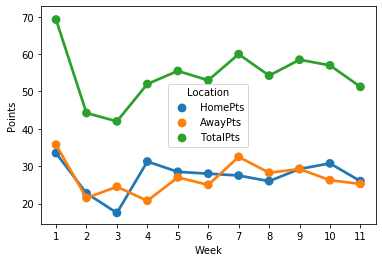

In [7]:
import seaborn as sns


grouped = (df_week_mean.drop('Attendance', 1))
grouped['Week'] = grouped.index
grouped = pd.melt(grouped, id_vars=["Week"], value_vars=['HomePts', 'AwayPts', 'TotalPts'])
grouped.columns = ["Week", 'Location', 'Points']

sns.pointplot(x='Week', y='Points', hue='Location',  data=grouped)

In [20]:



import requests
import pandas as pd
from bs4 import BeautifulSoup
import re

url = 'https://semi-rad.com/category/friday-inspiration/'
req = requests.get(url, verify=False).text
soup = BeautifulSoup(req, 'lxml')
snip = soup.findAll('div', 'social-sharing')
for i in range(len(snip)):
    print(snip[i]['data-permalink'])


for page in range(9):
    url = f'https://semi-rad.com/category/friday-inspiration/page/{page}/'
    snip = soup.findAll('div', 'social-sharing')
    for i in range(len(snip)):
        print(snip[i]['data-permalink'])

# print(snip)


/home/bryce/anaconda3/lib/python3.7/site-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


https://semi-rad.com/2019/12/friday-inspiration-vol-211/
https://semi-rad.com/2019/11/friday-inspiration-vol-210/
https://semi-rad.com/2019/11/friday-inspiration-vol-209/
https://semi-rad.com/2019/11/friday-inspiration-vol-208/
https://semi-rad.com/2019/11/friday-inspiration-vol-207/
https://semi-rad.com/2019/11/friday-inspiration-vol-206/
https://semi-rad.com/2019/10/friday-inspiration-vol-205/
https://semi-rad.com/2019/10/friday-inspiration-vol-203/
https://semi-rad.com/2019/10/friday-inspiration-vol-202/
https://semi-rad.com/2019/09/friday-inspiration-vol-201/
https://semi-rad.com/2019/09/friday-inspiration-vol-200/
https://semi-rad.com/2019/09/friday-inspiration-vol-199/
https://semi-rad.com/2019/09/friday-inspiration-vol-198/
https://semi-rad.com/2019/08/friday-inspiration-vol-197/
https://semi-rad.com/2019/08/friday-inspiration-vol-196/
https://semi-rad.com/2019/08/friday-inspiration-vol-195/
https://semi-rad.com/2019/08/friday-inspiration-vol-194/
https://semi-rad.com/2019/08/fr